In [2]:
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import input_data

### Load example data (HCP minimally preprocessed in MNI space).

In [1]:
hp200_clean_wbsreg = '/home/despoB/connectome-data/100206/rfMRI_REST1_LR/rfMRI_REST1_LR_hp2000_clean_wbsreg.nii'

In [3]:
brainmask_fs = nib.load('/home/despoB/connectome-raw/100206/MNINonLinear/Results/rfMRI_REST1_LR/brainmask_fs.2.nii.gz')

In [4]:
BNA_2mm = '/home/despoB/dlurie/Data/reference/Brainnetome/BNA-maxprob-thr25-2mm.nii.gz'

### Extract timeseries from Brainnetome regions

In [5]:
bna_img = nib.load(BNA_2mm)

In [15]:
bna_masker = input_data.NiftiLabelsMasker(labels_img=bna_img, background_label=0, mask_img=brainmask_fs,
                                          standardize=False,  detrend=False, low_pass=0.2, high_pass=0.01, t_r=0.720,
                                          resampling_target="data")

In [24]:
timeseries = bna_masker.fit_transform(hp200_clean_wbsreg)

In [17]:
timeseries.shape

(1200, 246)

### Plot a correlation matrix and visualize timeseries characteristics

In [18]:
import matplotlib.pyplot as plt
from nilearn import plotting, connectome
%matplotlib inline

In [19]:
corrmat = np.corrcoef(timeseries.T)

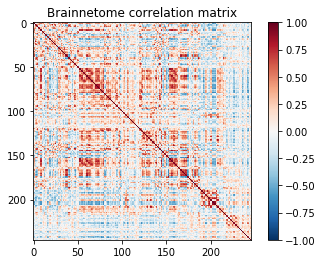

In [20]:
plt.imshow(corrmat, vmin=-1, vmax=1, cmap='RdBu_r', interpolation='nearest')
plt.colorbar()
plt.title('Brainnetome correlation matrix')

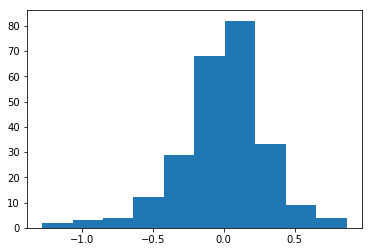

In [21]:
hist = plt.hist(np.mean(timeseries, axis=0))

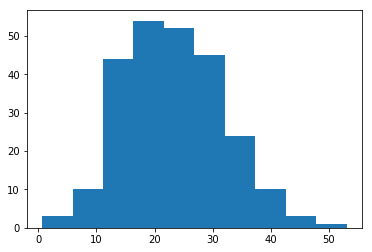

In [23]:
hist = plt.hist(np.std(timeseries, axis=0))